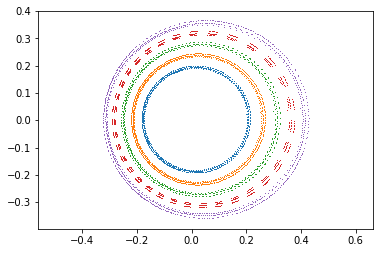

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.interpolate import lagrange
from common import f

nturn = 100   # number of toroidal turns
perturn = 10   # steps per toroidal turn
nstep = nturn*perturn  # total number of steps
dphi = 2*np.pi/perturn # step width

# Define magnetic field perturbation to get stochastic field
eps = 0.05
n = 2
def pert(ph): return eps*np.cos(n*ph)

def evaluate_pert(r, th, ph):
    f.evaluate(r, th, ph)
    return [f.Ath*(1.0 + pert(ph)), f.Aph*(1.0 + pert(ph)), 
            f.dAth*(1.0 + pert(ph)), f.dAph*(1.0 + pert(ph))]

def F(r, th, ph, pthold):
    [Ath, Aph, dAth, dAph] = evaluate_pert(r, th, ph)
    return dAth[0]*(Ath - pthold) - dphi*(dAth[0]*dAph[1] + dAth[1]*dAph[0])

z0s = [[0.2, 0.1, 0.0],
       [0.25, 0.1, 0.0],
       [0.3, 0.1, 0.0],
       [0.35, 0.1, 0.0],
       [0.4, 0.1, 0.0]]
norb = len(z0s)                  
    
plt.figure()    
for z0 in z0s:
    z = np.zeros([3,nstep+1])
    z[:,0] = z0
    [Ath, Aph, dAth, dAph] = evaluate_pert(z0[0], z0[1], z0[2])
    pth = Ath
    for kt in range(nstep):
        pthold = pth
        r0 = z[0,kt]

        # Implicit substep in r 
        sol = root(F, r0, method='hybr', tol=1e-12, args=(z[1,kt], z[2,kt], pthold))
        z[0,kt+1] = sol.x

        # Explicit substep in th
        [Ath, Aph, dAth, dAph] = evaluate_pert(sol.x, z[1,kt], z[2,kt])
        z[1,kt+1] = z[1,kt] - dphi*dAph[0]/dAth[0]
        z[2,kt+1] = z[2,kt] + dphi

    plt.plot(z[0, :]*np.cos(z[1, :]), z[0, :]*np.sin(z[1, :]), ',')
    
plt.axis('equal')
plt.show()